In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [4]:
# read iris dataset 
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# apply train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


In [5]:
# Changing the random state to 2
# apply train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

# check classification accuracy of KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


1.0


In [6]:
# changing the random state to 5
# apply train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# check classification accuracy of KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


The accuracy keeps shifting. This is why testing accuracy is known as a high variance estimate

## K-FOLD CROSS VALIDATION

Using cross validation to select best tuning parameters for KNN

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# 10 fold cross validation with k=5 for KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

# find avearage accuracy as an estimate of the out of sample accuracy
print(scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668


In [21]:
# search for optimal value of K for knn
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross validated accuracy')

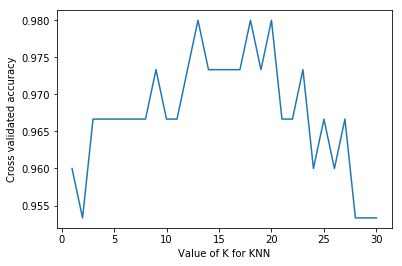

In [23]:
# visualize with matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross validated accuracy')

# from graph below, seemingly our best value of K would be 20

## Cross-Validation Model Selection

Comparing best KNN Model with logistic regression on the iris dataset

In [24]:
# 10 fold cross validation with best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [36]:
# 10 fold cross validation with logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')
print(cross_val_score(log_reg, X, y, cv=10, scoring='accuracy').mean())

0.9533333333333334


## Fearure Selection With Cross-Validation


Goal: Select whether feature selection should be included in linear regression model or not

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# read dataset
df = pd.read_csv('Advertising.csv', index_col=0)

# create list of feature items
feature_cols = ['TV', 'radio', 'newspaper']

# select subset of dataframe using list
X = df[feature_cols]

# set sales as the response (y)
y = df.sales

# 10 fold cross validation with all three features
all_features = LinearRegression()
mse_scores = -cross_val_score(all_features, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert MSE to RMSE
rmse_scores = np.sqrt(mse_scores)

# calculate average RMSE
print(rmse_scores.mean())

1.6913531708051797


In [54]:
# 10 fold cross validation excluding newspaper
feature_cols = ['TV', 'radio']
X = df[feature_cols]
mse_scores = -cross_val_score(all_features, X, y, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores.mean())

1.6796748419090768


## More Efficient Parameter Tuning With Grid Search CV

Allows you to define a grid of parameters that will be searched using K-Fold cross-validation

In [72]:
from sklearn.model_selection import GridSearchCV

# read iris dataset 
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# defining parameter values to be searched
k_range = range(1, 31)

# create a parameter Grid (maps the parameter names to the values that should be searched)
param_grid = dict(n_neighbors=k_range)

# instantiate grid CV
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# fit grid with data
grid.fit(X, y)

# view results (list of named tuples)
grid.cv_results_


/home/namrehs/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/namrehs/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/namrehs/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/namrehs/anaconda3/lib/

{'mean_fit_time': array([0.00040727, 0.00029495, 0.00028193, 0.0002799 , 0.00028002,
        0.00029538, 0.00035648, 0.00034027, 0.00033247, 0.00031934,
        0.00027862, 0.00027859, 0.00028284, 0.00029435, 0.00029337,
        0.00029001, 0.00030422, 0.00030055, 0.0003206 , 0.00029764,
        0.00033014, 0.00032055, 0.00032117, 0.00031457, 0.00030239,
        0.00033734, 0.00031641, 0.00030859, 0.00029411, 0.00028944]),
 'std_fit_time': array([7.97194724e-05, 1.34559568e-05, 7.14639557e-06, 6.53632264e-06,
        4.47598737e-06, 1.99633245e-05, 3.88598588e-05, 4.78455420e-05,
        4.45448923e-05, 3.63560113e-05, 2.33406796e-06, 1.77217349e-06,
        9.70457340e-06, 1.68897983e-05, 1.56799872e-05, 1.26870051e-05,
        1.65442567e-05, 1.87970635e-05, 3.49850406e-05, 1.00091516e-05,
        5.49564961e-05, 4.27003948e-05, 3.25930406e-05, 2.26161607e-05,
        1.79201501e-05, 4.37523038e-05, 4.09704760e-05, 4.68509252e-05,
        1.61746229e-05, 1.42701038e-05]),
 'mean_scor

In [80]:
# examine the test scores
grid_mean_scores = grid.cv_results_['mean_test_score']

Text(0, 0.5, 'Cross-Validation Accuracy')

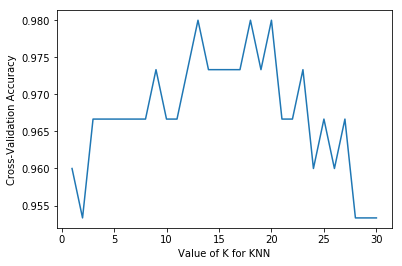

In [82]:
# visualizing using matplotlib
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')

In [84]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


## Searching Multiple Parameters Simulataneously

Tunign k and weights (which controls how knn parameters are weighted when making prediction, default is equal weight, distance weights closer neighbors more heavily than distant neighbors)

In [89]:
# define paramter values that should be searched
k_range = range(1, 31)
weight_options = ['uniform', 'distance']

# create a parameter grid 
param_grid = dict(n_neighbors=k_range, weights=weight_options)

# instantiate and fit grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# examine best model
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


## Using Best Parameters To Make Predictions

In [95]:
# train your model with best model parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X, y)

# make a prediction
print(knn.predict([[3, 4, 5, 2]]))

# using gridsearchcv shortcut
grid.predict([[3, 4, 5, 2]])


[1]


array([1])

## Reducing Computational Expense Using RnadomizedSearchCV

In [99]:
from sklearn.model_selection import RandomizedSearchCV

# specify parameter distribution
param_dist = dict(n_neighbors=k_range, weights=weight_options)

# instatiate RandomizedSearchCV. N_iter controls no of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

# fit
rand.fit(X, y)
rand.cv_results_

/home/namrehs/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/namrehs/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/namrehs/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/namrehs/anaconda3/lib/

{'mean_fit_time': array([0.00051022, 0.00033355, 0.0002852 , 0.00028579, 0.0002841 ,
        0.00028059, 0.00028038, 0.00028002, 0.00027807, 0.00029225]),
 'std_fit_time': array([2.58471428e-04, 3.38436832e-05, 8.23687022e-06, 6.20076261e-06,
        1.17495617e-05, 5.51097725e-06, 5.69715650e-06, 3.90926504e-06,
        1.97196812e-06, 3.00841925e-05]),
 'mean_score_time': array([0.00099616, 0.00103767, 0.00089636, 0.0008873 , 0.0008894 ,
        0.00055032, 0.00056722, 0.00086272, 0.00055323, 0.00087657]),
 'std_score_time': array([4.61431881e-04, 1.01908147e-04, 8.01585956e-05, 1.54719514e-05,
        1.79784683e-05, 6.11096166e-06, 3.56903933e-06, 1.46828877e-05,
        1.31589778e-05, 2.62782704e-05]),
 'param_weights': masked_array(data=['distance', 'uniform', 'uniform', 'uniform', 'uniform',
                    'distance', 'distance', 'uniform', 'distance',
                    'uniform'],
              mask=[False, False, False, False, False, False, False, False,
              

In [100]:
# print out best model
print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}
